In [1]:
import pandas as pd

data_df = pd.read_csv("data/atec_nlp_sim_train_all.csv", sep="\t", header=None, 
                      encoding="utf-8-sig", names=["sent1", "sent2", "label"])
data_df.head(10)

,sent1,sent2,label
1,﻿怎么更改花呗手机号码,我的花呗是以前的手机号码，怎么更改成现在的支付宝的号码手机号,1
2,也开不了花呗，就这样了？完事了,真的嘛？就是花呗付款,0
3,花呗冻结以后还能开通吗,我的条件可以开通花呗借款吗,0
4,如何得知关闭借呗,想永久关闭借呗,0
5,花呗扫码付钱,二维码扫描可以用花呗吗,0
6,花呗逾期后不能分期吗,我这个 逾期后还完了 最低还款 后 能分期吗,0
7,花呗分期清空,花呗分期查询,0
8,借呗逾期短信通知,如何购买花呗短信通知,0
9,借呗即将到期要还的账单还能分期吗,借呗要分期还，是吗,0
10,花呗为什么不能支付手机交易,花呗透支了为什么不可以继续用了,0


In [2]:
import jieba

# 添加自定义词典
jieba.load_userdict("data/atec_dict.txt")
# 分词测试
seg_words = jieba.lcut("怎么更改花呗手机号码")
print(seg_words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.746 seconds.
Prefix dict has been built successfully.


['怎么', '更改', '花呗', '手机号码']


In [3]:
data_df["sent1"] = data_df["sent1"].apply(lambda x: jieba.lcut(x.strip("\r\t ").replace("***","*")))
data_df["sent2"] = data_df["sent2"].apply(lambda x: jieba.lcut(x.strip("\r\t ").replace("***","*")))
data_df.head(10)

,sent1,sent2,label
1,"[﻿, 怎么, 更改, 花呗, 手机号码]","[我, 的, 花呗, 是, 以前, 的, 手机号码, ，, 怎么, 更, 改成, 现在, 的...",1
2,"[也, 开, 不了, 花呗, ，, 就, 这样, 了, ？, 完事, 了]","[真的, 嘛, ？, 就是, 花呗, 付款]",0
3,"[花呗, 冻结, 以后, 还, 能, 开通, 吗]","[我, 的, 条件, 可以, 开通, 花呗, 借款, 吗]",0
4,"[如何, 得知, 关闭, 借呗]","[想, 永久, 关闭, 借呗]",0
5,"[花呗, 扫码, 付钱]","[二维码, 扫描, 可以, 用, 花呗, 吗]",0
6,"[花呗, 逾期, 后, 不能, 分期, 吗]","[我, 这个, , 逾期, 后, 还, 完, 了, , 最低, 还款, , 后, ,...",0
7,"[花呗, 分期, 清空]","[花呗, 分期, 查询]",0
8,"[借呗, 逾期, 短信, 通知]","[如何, 购买, 花呗, 短信, 通知]",0
9,"[借呗, 即将, 到期, 要, 还, 的, 账单, 还, 能, 分期, 吗]","[借呗, 要, 分期, 还, ，, 是, 吗]",0
10,"[花呗, 为什么, 不能, 支付, 手机, 交易]","[花呗, 透支, 了, 为什么, 不, 可以, 继续, 用, 了]",0


In [4]:
from collections import Counter

c = Counter()
sent_data = data_df["sent1"].values + data_df["sent2"].values
for d in sent_data:
    c.update(d)
word_counts = sorted(dict(c).items(), key=lambda x: x[1], reverse=True)

print(word_counts[:10])

[('花呗', 141731), ('我', 61743), ('借呗', 61340), ('的', 60189), ('了', 47468), ('，', 46908), ('吗', 42196), ('还', 35076), ('怎么', 33715), ('还款', 29525)]


In [5]:
vocab_words = ["<PAD>", "<UNK>"]
for w, c in word_counts:
    vocab_words.append(w)

vocab2id = {w: i for i, w in enumerate(vocab_words)}
id2vocab = {i: w for i, w in enumerate(vocab_words)}

print("vocab size: ", len(vocab2id))
print(list(vocab2id.items())[:5])
print(list(id2vocab.items())[:5])

vocab size:  13263
[('<PAD>', 0), ('<UNK>', 1), ('花呗', 2), ('我', 3), ('借呗', 4)]
[(0, '<PAD>'), (1, '<UNK>'), (2, '花呗'), (3, '我'), (4, '借呗')]


In [6]:
with open("data/vocab.txt", "w", encoding="utf8") as f:
    for w, i in vocab2id.items():
        f.write(w+"\n")

In [7]:
def sent2index(vocab2id, words):
    return [vocab2id[w] if w in vocab2id else vocab2id["<UNK>"] for w in words]

data_df["sent1"] = data_df["sent1"].apply(lambda x: sent2index(vocab2id, x))
data_df["sent2"] = data_df["sent2"].apply(lambda x: sent2index(vocab2id, x))

data_df.head(10)

,sent1,sent2,label
1,"[5265, 10, 238, 2, 214]","[3, 5, 2, 17, 150, 5, 214, 7, 10, 1006, 583, 4...",1
2,"[102, 153, 32, 2, 7, 72, 591, 6, 134, 3073, 6]","[829, 132, 134, 211, 2, 33]",0
3,"[2, 110, 181, 9, 23, 19, 8]","[3, 5, 202, 12, 19, 2, 119, 8]",0
4,"[57, 6940, 52, 4]","[68, 570, 52, 4]",0
5,"[2, 314, 584]","[212, 1031, 12, 13, 2, 8]",0
6,"[2, 38, 47, 22, 18, 8]","[3, 53, 28, 38, 47, 9, 91, 6, 28, 98, 11, 28, ...",0
7,"[2, 18, 2285]","[2, 18, 226]",0
8,"[4, 38, 216, 402]","[57, 271, 2, 216, 402]",0
9,"[4, 2886, 196, 54, 9, 5, 63, 9, 23, 18, 8]","[4, 54, 18, 9, 7, 17, 8]",0
10,"[2, 14, 22, 34, 97, 232]","[2, 377, 6, 14, 26, 12, 327, 13, 6]",0


In [34]:
max_len = 15
vocab_size = len(vocab2id)
embedding_size = 128
filters = 200
kernel_sizes = [3,4,5]
output_dim = 100

In [35]:
from keras.layers import Input,Embedding,Dot,Dense
from keras.layers import GlobalMaxPool1D,Dropout,Conv1D
from keras.models import Model

In [36]:
max_len = 15
vocab_size = len(vocab2id)
embedding_size = 128
filters = 200
kernel_sizes = [3,4,5]
output_dim = 100

In [37]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def batch_generator(all_data, batch_size, maxlen, shuffle=True):
    """
    :param all_data : all_data整个数据集，包含输入和输出标签
    :param batch_size: batch_size表示每个batch的大小
    :param shuffle: 是否打乱顺序
    :return:
    """
    # 输入all_datas的每一项必须是numpy数组，保证后面能按p所示取值
    all_data = [np.array(d) for d in all_data]
    # 获取样本大小
    data_size = all_data[0].shape[0]

    if shuffle:
        # 随机生成打乱的索引
        p = np.random.permutation(data_size)
        # 重新组织数据
        all_data = [d[p] for d in all_data]
        
    batch_count = 0
    while True:
        # 数据一轮循环(epoch)完成，打乱一次顺序
        if batch_count * batch_size + batch_size > data_size:
            batch_count = 0
            if shuffle:
                p = np.random.permutation(data_size)
                all_data = [d[p] for d in all_data]
        start = batch_count * batch_size
        end = start + batch_size
        batch_count += 1
        batch_data = [d[start: end] for d in all_data]
        batch_sent1, batch_sent2, batch_label = batch_data
        
        batch_sent1_pad = pad_sequences(batch_sent1, maxlen=max_len, padding='post')
        batch_sent2_pad = pad_sequences(batch_sent2, maxlen=max_len, padding='post')
        
        yield [batch_sent1_pad, batch_sent2_pad], batch_label

In [38]:
sent1_datas = data_df["sent1"].values.tolist()
sent2_datas = data_df["sent2"].values.tolist()
labels = data_df["label"].values.tolist()

In [53]:
len(sent2_datas)

102477

In [54]:
sent2_datas[0]

[3, 5, 2, 17, 150, 5, 214, 7, 10, 1006, 583, 42, 5, 31, 5, 172, 104]

In [55]:
type(sent2_datas)

list

In [39]:
# 划分训练 测试数据集
count = len(labels)
idx1, idx2 = int(count*0.8), int(count*0.9)
sent1_train, sent2_train = sent1_datas[:idx1], sent2_datas[:idx1]
sent1_val, sent2_val = sent1_datas[idx1:idx2], sent2_datas[idx1:idx2]
sent1_test, sent2_test = sent1_datas[idx2:], sent2_datas[idx2:]

train_labels, val_labels, test_labels = labels[:idx1], labels[idx1:idx2], labels[idx2:]

print("train data: ", len(sent1_train), len(sent2_train), len(train_labels))
print("val data: ", len(sent1_val), len(sent2_val), len(val_labels))
print("test data: ", len(sent1_test), len(sent2_test), len(test_labels))

train data:  81981 81981 81981
val data:  10248 10248 10248
test data:  10248 10248 10248


In [40]:
# batch数据的生成器
batch_size = 64
maxlen = 15
batch_count = int(len(train_labels) / batch_size)
batch_gen_train = batch_generator([sent1_train, sent2_train, train_labels], batch_size, max_len)
batch_gen_val = batch_generator([sent1_val, sent2_val, val_labels], batch_size, max_len)
batch_gen_test = batch_generator([sent1_test, sent2_test, test_labels], batch_size, max_len)

# cdssm

In [26]:
epochs = 1

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(batch_gen_train, 
                    verbose=1, 
                    validation_data=batch_gen_val,
                    validation_steps=100,
                    steps_per_epoch=batch_count, 
                    epochs=2)

# 预测模型
score, acc = model.evaluate(batch_gen_test, steps=50, 
                                      max_queue_size=10, 
                                      use_multiprocessing=False)
print('score:', score, 'accuracy:', acc)

# 保存训练好的模型
# model.save("output/cnndssm_semantic_match.h5")
model.save_weights("output/cdssm_weight.h5")

C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/2
1280/1280 [==============================] - 113s 88ms/step - loss: 2.8909 - accuracy: 0.8126 - val_loss: 2.4101 - val_accuracy: 0.8328
Epoch 2/2
50/50 [==============================] - 0s 9ms/step
score: 2.8921778202056885 accuracy: 0.8475000262260437


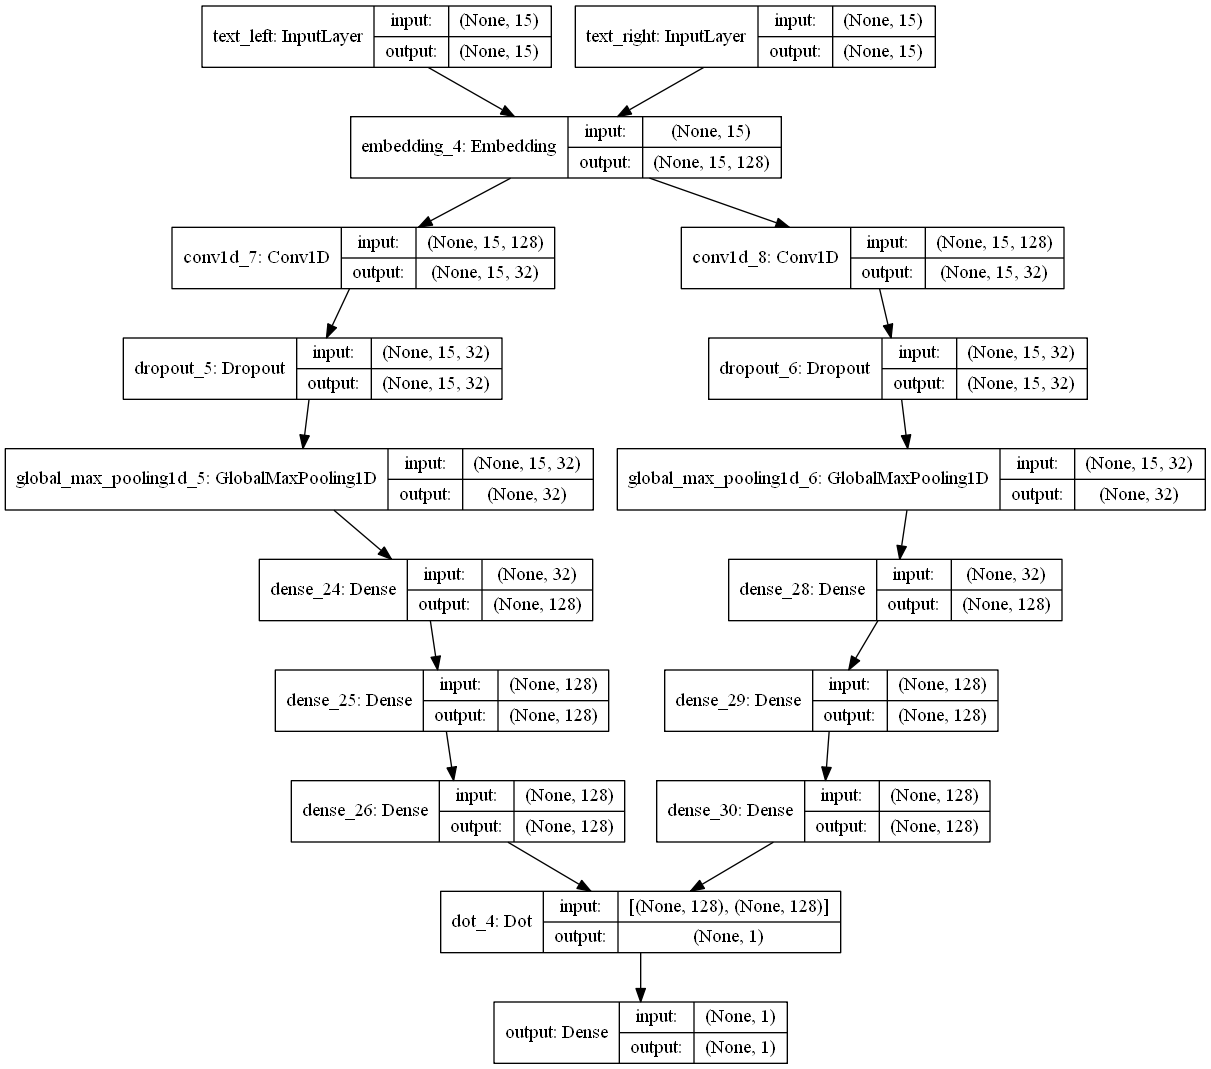

In [27]:
from keras.utils import plot_model
plot_model(model, './cdssm.png', show_shapes=True)

In [28]:
del model

# DenseBaseline

In [16]:
from keras.layers import concatenate

In [34]:
input1 = Input(name='text_left', shape=(max_len,))
input2 = Input(name='text_right', shape=(max_len,))
# embedding = Embedding(vocab_size, embedding_size)
# sent1_embed=embedding(input1)
# sent2_embed=embedding(input2)
concatenate_1=concatenate([input1,input2],axis=-1)
dense1=Dense(300)(concatenate_1)
dense2=Dense(300)(dense1)
dense3=Dense(128)(dense2)
outputs=Dense(1,activation='sigmoid',name="output")(dense3)
model=Model(inputs=[input1,input2],outputs=outputs)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_left (InputLayer)          (None, 15)           0                                            
__________________________________________________________________________________________________
text_right (InputLayer)         (None, 15)           0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 30)           0           text_left[0][0]                  
                                                                 text_right[0][0]                 
__________________________________________________________________________________________________
dense_38 (Dense)                (None, 300)          9300        concatenate_3[0][0]        

In [47]:
epochs = 1

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(batch_gen_train, 
                    verbose=1, 
                    validation_data=batch_gen_val,
                    validation_steps=100,
                    steps_per_epoch=batch_count, 
                    epochs=1)

# 预测模型
score, acc = model.evaluate(batch_gen_test, steps=50, 
                                      max_queue_size=10, 
                                      use_multiprocessing=False)
print('score:', score, 'accuracy:', acc)

# 保存训练好的模型
# model.save("output/cnndssm_semantic_match.h5")
model.save_weights("output/DenseBaseline_weight.h5")

C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
50/50 [==============================] - 0s 6ms/step
score: 0.644302248954773 accuracy: 0.7806249856948853


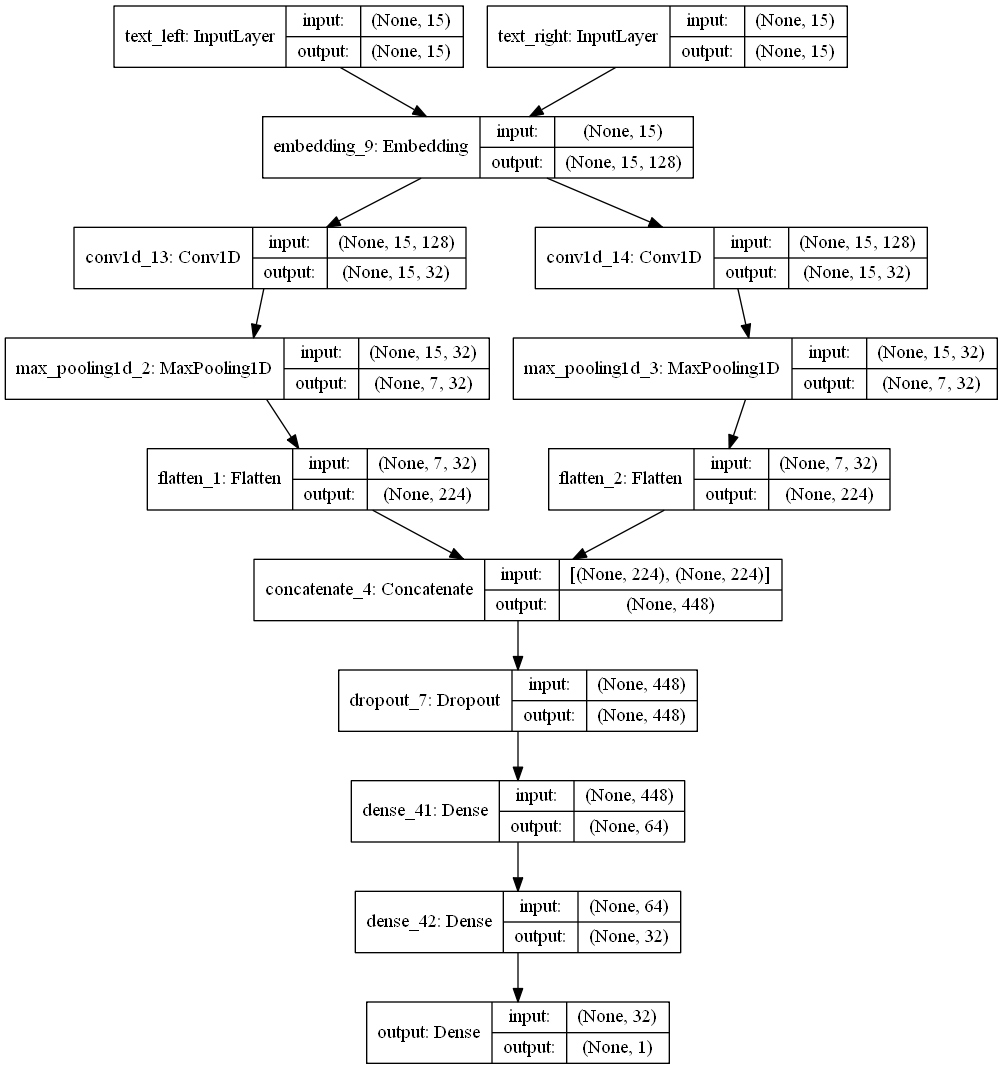

In [48]:
from keras.utils import plot_model
plot_model(model, './DenseBaseline.png', show_shapes=True)

# ArcI

In [15]:
from keras.layers import Flatten,Concatenate,MaxPool1D,MaxPooling1D

In [42]:
input1 = Input(name='text_left', shape=(max_len,))
input2 = Input(name='text_right', shape=(max_len,))
embedding = Embedding(vocab_size, embedding_size)
sent1_embed=embedding(input1)
sent2_embed=embedding(input2)
cnn1=Conv1D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu',kernel_initializer='glorot_normal',bias_initializer='zeros')(sent1_embed)
cnn2=Conv1D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu',kernel_initializer='glorot_normal',bias_initializer='zeros')(sent2_embed)
cnn1=MaxPooling1D(pool_size=2)(cnn1)
flat1=Flatten()(cnn1)
cnn2=MaxPooling1D(pool_size=2)(cnn2)
flat2=Flatten()(cnn2)
# concatenate_1=concatenate([input1,input2],axis=-1)
concat =Concatenate(axis=1)([flat1, flat2])
dropout = Dropout(rate=0)(concat)
dense1=Dense(64)(dropout)
dense2=Dense(32)(dense1)
# dense3=Dense(128)(dense2)
outputs=Dense(1,activation='sigmoid',name="output")(dense2)
model=Model(inputs=[input1,input2],outputs=outputs)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_left (InputLayer)          (None, 15)           0                                            
__________________________________________________________________________________________________
text_right (InputLayer)         (None, 15)           0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 15, 128)      1697664     text_left[0][0]                  
                                                                 text_right[0][0]                 
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 15, 32)       12320       embedding_9[0][0]          

In [45]:
epochs = 1

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(batch_gen_train, 
                    verbose=1, 
                    validation_data=batch_gen_val,
                    validation_steps=100,
                    steps_per_epoch=batch_count, 
                    epochs=epochs)

# 预测模型
score, acc = model.evaluate(batch_gen_test, steps=50, 
                                      max_queue_size=10, 
                                      use_multiprocessing=False)
print('score:', score, 'accuracy:', acc)

# 保存训练好的模型
# model.save("output/cnndssm_semantic_match.h5")
model.save_weights("output/ArcI_weight.h5")

C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
50/50 [==============================] - 0s 5ms/step
score: 0.5998790860176086 accuracy: 0.7753124833106995


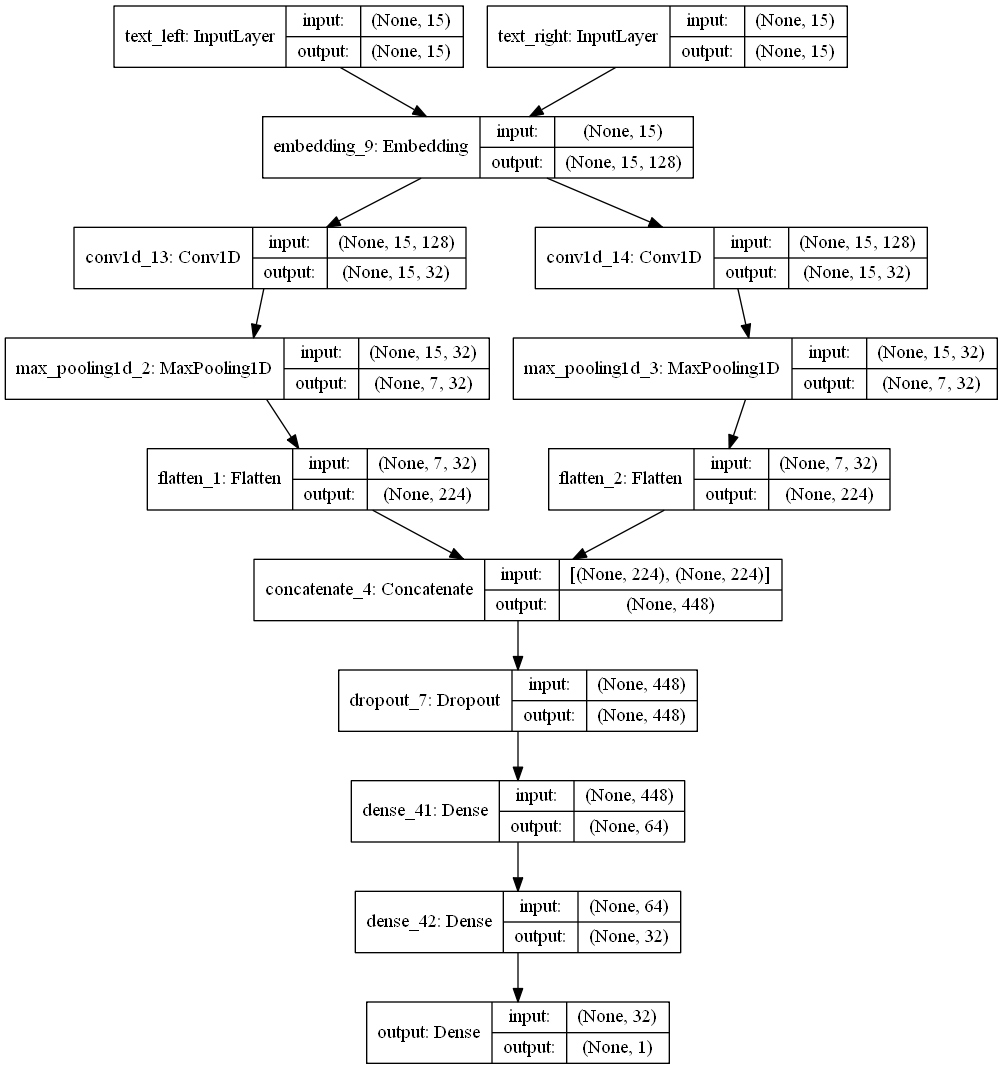

In [46]:
from keras.utils import plot_model
plot_model(model, './ArcI.png', show_shapes=True)

# ArcII

In [ ]:
## 这个需要专属层

In [ ]:
# MatchingLayer(matching_type='plus')

# KNRM

In [12]:
import tensorflow as tf

In [13]:
from keras.layers import Activation

In [14]:
from keras.layers import Layer

In [95]:
def _kernel_layer(mu: float, sigma: float) ->Layer:
    """
    Gaussian kernel layer in KNRM.

    :param mu: Float, mean of the kernel.
    :param sigma: Float, sigma of the kernel.
    :return: `keras.layers.Layer`.
    """

    def kernel(x):
        return tf.math.exp(-0.5 * (x - mu) * (x - mu) / sigma / sigma)

    return Activation(kernel)

In [11]:
from keras.layers import Lambda

In [57]:
input1 = Input(name='text_left', shape=(max_len,))
input2 = Input(name='text_right', shape=(max_len,))
embedding = Embedding(vocab_size, embedding_size)
sent1_embed=embedding(input1)
sent2_embed=embedding(input2)
mm =Dot(axes=[2, 2], normalize=True)([sent1_embed, sent2_embed])
KM = []
for i in range(11):
    mu = 1. / (11 - 1) + (2. * i) / (11 - 1) - 1.0
    sigma = 0.1
    if mu > 1.0:
        sigma = 0.001
        mu = 1.0
    mm_exp = _kernel_layer(mu, sigma)(mm)
    mm_doc_sum = Lambda(
        lambda x: tf.reduce_sum(x, 2))(mm_exp)
    mm_log = Activation(tf.math.log1p)(mm_doc_sum)
    mm_sum = Lambda(
        lambda x: tf.reduce_sum(x, 1))(mm_log)
    KM.append(mm_sum)

phi = Lambda(lambda x: tf.stack(x, 1))(KM)
outputs=Dense(1,activation='sigmoid',name="output")(phi)
model=Model(inputs=[input1,input2],outputs=outputs)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_left (InputLayer)          (None, 15)           0                                            
__________________________________________________________________________________________________
text_right (InputLayer)         (None, 15)           0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 15, 128)      1697664     text_left[0][0]                  
                                                                 text_right[0][0]                 
__________________________________________________________________________________________________
dot_6 (Dot)                     (None, 15, 15)       0           embedding_11[0][0]         

In [58]:
epochs = 1

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(batch_gen_train, 
                    verbose=1, 
                    validation_data=batch_gen_val,
                    validation_steps=100,
                    steps_per_epoch=batch_count, 
                    epochs=epochs)

# 预测模型
score, acc = model.evaluate(batch_gen_test, steps=50, 
                                      max_queue_size=10, 
                                      use_multiprocessing=False)
print('score:', score, 'accuracy:', acc)

# 保存训练好的模型
# model.save("output/cnndssm_semantic_match.h5")
model.save_weights("output/KNRM_weight.h5")

C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
50/50 [==============================] - 0s 6ms/step
score: 0.5707255601882935 accuracy: 0.8359375


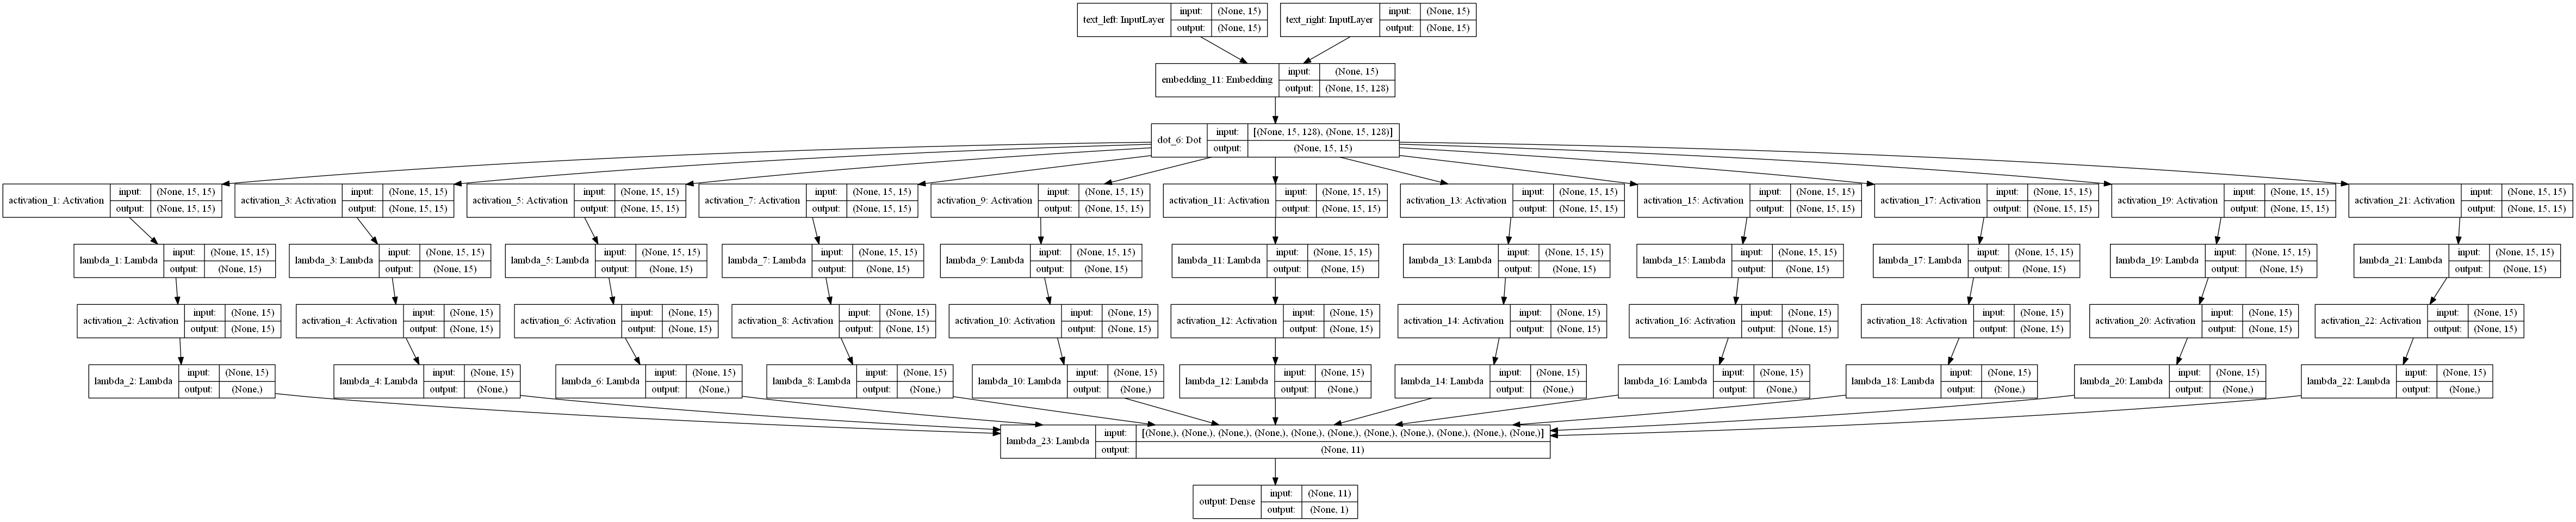

In [59]:
from keras.utils import plot_model
plot_model(model, './KNRM.png', show_shapes=True)

In [60]:
del model

# DUET

In [61]:
from keras.layers import Reshape

In [70]:
def _xor_match(x):
    t1 = x[0]
    t2 = x[1]
    t1_shape = t1.get_shape()
    t2_shape = t2.get_shape()
    t1_expand = tf.stack([t1] * t2_shape[1], 2)
    t2_expand = tf.stack([t2] * t1_shape[1], 1)
    out_bool = tf.equal(t1_expand, t2_expand)
    out = tf.cast(out_bool, tf.float32)
    return out

In [71]:
def _hadamard_dot(cls, x):
        x1 = x[0]
        x2 = x[1]
        out = x1 * x2
        return out

In [72]:
import keras

In [73]:
vocab_size

13263

In [74]:
embedding_size

128

In [76]:
# input1 = Input(name='text_left', shape=(max_len,))
# input2 = Input(name='text_right', shape=(max_len,))
# embedding = Embedding(vocab_size, embedding_size)
# sent1_embed=embedding(input1)
# sent2_embed=embedding(input2)
# # 这是啥子
# lm_xor = keras.layers.Lambda(_xor_match)([sent1_embed, sent2_embed])
# lm_conv = keras.layers.Conv1D(32,30,padding='same',activation='relu')(lm_xor)
# lm_conv = keras.layers.Dropout(0.5)(lm_conv)
# lm_feat = keras.layers.Reshape((-1,))(lm_conv)
# for hidden_size in self._params['lm_hidden_sizes']:
#     lm_feat = keras.layers.Dense(hidden_size,activation='relu')(lm_feat)
# lm_drop = keras.layers.Dropout(0.5)(lm_feat)
# lm_score = keras.layers.Dense(1)(lm_drop)
# dm_q_conv = keras.layers.Conv1D(32,3,padding='same',activation='relu')(sent1_embed)
# dm_q_conv = keras.layers.Dropout(0.5)(dm_q_conv)
# dm_q_mp = keras.layers.MaxPooling1D(pool_size=3)(dm_q_conv)
# dm_q_rep = keras.layers.Reshape((-1,))(dm_q_mp)
# dm_q_rep = keras.layers.Dense(32)(dm_q_rep)
# dm_q_rep = keras.layers.Lambda(lambda x: tf.expand_dims(x, 1))(
#     dm_q_rep)
# dm_d_conv1 = keras.layers.Conv1D(32,3,padding='same',activation='relu')(sent2_embed)
# dm_d_conv1 = keras.layers.Dropout(0.5)(dm_d_conv1)
# dm_d_mp = keras.layers.MaxPooling1D(pool_size=3)(dm_d_conv1)
# dm_d_conv2 = keras.layers.Conv1D(32, 3,padding='same',activation='relu')(dm_d_mp)
# dm_d_conv2 = keras.layers.Dropout(0.5)(dm_d_conv2)
# h_dot = keras.layers.Lambda(_hadamard_dot)([dm_q_rep, dm_d_conv2])
# dm_feat = keras.layers.Reshape((-1,))(h_dot)
# for hidden_size in [64, 32]:
#     dm_feat = keras.layers.Dense(hidden_size)(dm_feat)
# dm_feat_drop = keras.layers.Dropout(0.5)(dm_feat)
# dm_score = keras.layers.Dense(1)(dm_feat_drop)
# add = keras.layers.Add()([lm_score, dm_score])
# outputs=Dense(1,activation='sigmoid',name="output")(add)
# model=Model(inputs=[input1,input2],outputs=outputs)
# model.summary()

In [10]:
mz.models.list_available()


[matchzoo.models.naive.Naive,
 matchzoo.models.dssm.DSSM,
 matchzoo.models.cdssm.CDSSM,
 matchzoo.models.dense_baseline.DenseBaseline,
 matchzoo.models.arci.ArcI,
 matchzoo.models.arcii.ArcII,
 matchzoo.models.match_pyramid.MatchPyramid,
 matchzoo.models.knrm.KNRM,
 matchzoo.models.duet.DUET,
 matchzoo.models.drmmtks.DRMMTKS,
 matchzoo.models.drmm.DRMM,
 matchzoo.models.anmm.ANMM,
 matchzoo.models.mvlstm.MVLSTM,
 matchzoo.contrib.models.match_lstm.MatchLSTM,
 matchzoo.contrib.models.match_srnn.MatchSRNN,
 matchzoo.contrib.models.hbmp.HBMP,
 matchzoo.contrib.models.esim.ESIM,
 matchzoo.contrib.models.bimpm.BiMPM,
 matchzoo.contrib.models.diin.DIIN,
 matchzoo.models.conv_knrm.ConvKNRM]

# DRMMTKS

In [18]:
import keras

In [19]:
from keras.backend import floatx

In [20]:
from keras.layers import Layer

In [23]:
import typing

In [24]:
def attention_layer(attention_input: typing.Any,
                        attention_mask: typing.Any = None
                        ) -> Layer:
        dense_input = Dense(1, use_bias=False)(attention_input)
        if attention_mask is not None:
            # Since attention_mask is 1.0 for positions we want to attend and
            # 0.0 for masked positions, this operation will create a tensor
            # which is 0.0 for positions we want to attend and -10000.0 for
            # masked positions.

            # shape = [B, L, 1]
            dense_input = Lambda(
                lambda x: x + (1.0 - attention_mask) * -10000.0,
                name="attention_mask"
            )(dense_input)
        # shape = [B, L, 1]
        attention_probs =Lambda(
            lambda x: tf.nn.softmax(x, axis=1),
            output_shape=lambda s: (s[0], s[1], s[2]),
            name="attention_probs"
        )(dense_input)
        return attention_probs

In [25]:
a= [(5,), (300,)]

In [26]:
a[0][0]

5

In [27]:
a[1][0]

300

In [31]:
def _make_multi_layer_perceptron_layer() -> keras.layers.Layer:
        # TODO: do not create new layers for a second call
        if not True:
            raise AttributeError(
                'Parameter `with_multi_layer_perception` not set.')

        def _wrapper(x):
            activation = 'relu'
            for _ in range(3):
                x = keras.layers.Dense(128,
                                       activation=activation)(x)
            return keras.layers.Dense(64,
                                      activation=activation)(x)

        return _wrapper

In [32]:
input1 = Input(name='text_left', shape=(max_len,))
input2 = Input(name='text_right', shape=(max_len,))
embedding = Embedding(vocab_size, embedding_size)
sent1_embed=embedding(input1)
sent2_embed=embedding(input2)
atten_mask = tf.not_equal(input1, -1)
atten_mask = tf.cast(atten_mask,floatx())
# shape = [B, L, 1]
atten_mask = tf.expand_dims(atten_mask, axis=2)
# shape = [B, L, 1]
attention_probs =attention_layer(sent1_embed, atten_mask)

# Matching histogram of top-k
# shape = [B, L, R]
matching_matrix =Dot(axes=[2, 2], normalize=True)([sent1_embed,sent2_embed])
# shape = [B, L, K]
effective_top_k = min(20,5,300)
matching_topk = Lambda(
    lambda x: tf.nn.top_k(x, k=effective_top_k, sorted=True)[0]
)(matching_matrix)

# Process right input.
# shape = [B, L, 1]
dense_output =_make_multi_layer_perceptron_layer()(matching_topk)

# shape = [B, 1, 1]
dot_score = Dot(axes=[1, 1])(
    [attention_probs, dense_output])

flatten_score = Flatten()(dot_score)
outputs=Dense(1,activation='sigmoid',name="output")(flatten_score)
model=Model(inputs=[input1,input2],outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_left (InputLayer)          (None, 15)           0                                            
__________________________________________________________________________________________________
text_right (InputLayer)         (None, 15)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 15, 128)      1697664     text_left[0][0]                  
                                                                 text_right[0][0]                 
__________________________________________________________________________________________________
dot_2 (Dot)                     (None, 15, 15)       0           embedding_2[0][0]          

In [41]:
epochs = 1

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(batch_gen_train, 
                    verbose=1, 
                    validation_data=batch_gen_val,
                    validation_steps=100,
                    steps_per_epoch=batch_count, 
                    epochs=epochs)

# 预测模型
score, acc = model.evaluate(batch_gen_test, steps=50, 
                                      max_queue_size=10, 
                                      use_multiprocessing=False)
print('score:', score, 'accuracy:', acc)

# 保存训练好的模型
# model.save("output/cnndssm_semantic_match.h5")
model.save_weights("output/DRMMTKS_weight.h5")

C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
50/50 [==============================] - 0s 8ms/step
score: 0.3182537853717804 accuracy: 0.8571875095367432


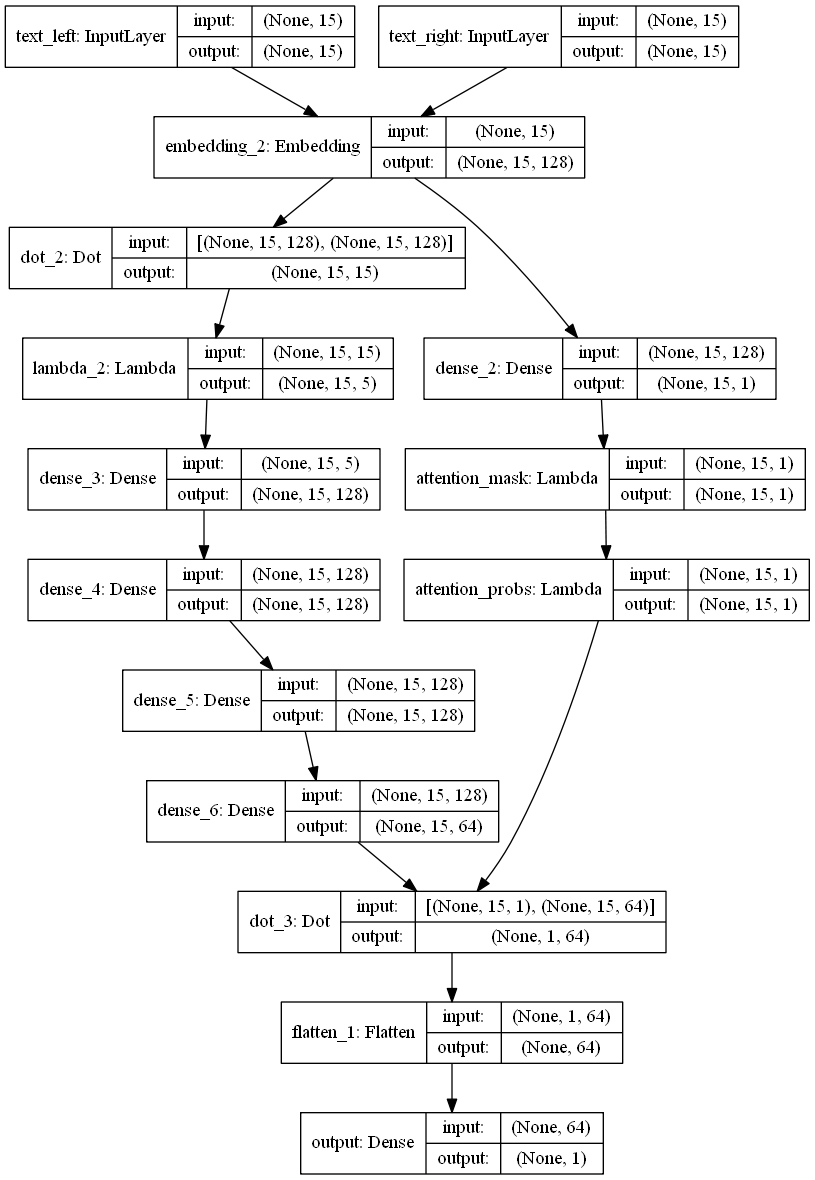

In [42]:
from keras.utils import plot_model
plot_model(model, './DRMMTKS.png', show_shapes=True)

In [43]:
del model

# DRMM

In [ ]:
def _make_output_layer() -> Layer:
        """:return: a correctly shaped keras dense layer for model output."""
        task = self._params['task']
        if isinstance(task, tasks.Classification):
            return keras.layers.Dense(task.num_classes, activation='softmax')
        elif isinstance(task, tasks.Ranking):
            return keras.layers.Dense(1, activation='linear')
        else:
            raise ValueError(f"{task} is not a valid task type."
                             f"Must be in `Ranking` and `Classification`.")


In [47]:
a = [(5,), (5, 30,)]

In [48]:
a[0]

(5,)

In [49]:
a[1]

(5, 30)

In [66]:
query = Input(name='text_left', shape=(max_len,))
match_hist  = Input(name='match_histogram', shape=(max_len,1))
embedding = Embedding(vocab_size, embedding_size)
embed_query = embedding(query)
# shape = [B, L]
atten_mask = tf.not_equal(query,-1)
# shape = [B, L]
atten_mask = tf.cast(atten_mask, floatx())
# shape = [B, L, D]
atten_mask = tf.expand_dims(atten_mask, axis=2)
# shape = [B, L, D]
attention_probs = attention_layer(embed_query, atten_mask)

dense_output =_make_multi_layer_perceptron_layer()(match_hist)

dot_score =Dot(axes=[1, 1])([attention_probs, dense_output])

flatten_score = Flatten()(dot_score)

outputs=Dense(1,activation='linear',name="output")(flatten_score)

model=Model(inputs=[query,match_hist],outputs=outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_left (InputLayer)          (None, 15)           0                                            
__________________________________________________________________________________________________
match_histogram (InputLayer)    (None, 15, 1)        0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 15, 128)      1697664     text_left[0][0]                  
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 15, 128)      256         match_histogram[0][0]            
____________________________________________________________________________________________

In [67]:
epochs = 1

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(batch_gen_train, 
                    verbose=1, 
                    validation_data=batch_gen_val,
                    validation_steps=100,
                    steps_per_epoch=batch_count, 
                    epochs=epochs)

# 预测模型
score, acc = model.evaluate(batch_gen_test, steps=50, 
                                      max_queue_size=10, 
                                      use_multiprocessing=False)
print('score:', score, 'accuracy:', acc)

# 保存训练好的模型
# model.save("output/cnndssm_semantic_match.h5")
model.save_weights("output/DRMM_weight.h5")

C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1


ValueError: Error when checking input: expected match_histogram to have 3 dimensions, but got array with shape (64, 15)

# ANMM

In [68]:
from keras.activations import softmax
from keras.initializers import RandomUniform

In [72]:
from keras.layers import Reshape

## 这个不行

In [82]:
# query=Input(name='text_left', shape=(max_len,))
# doc = Input(name='text_right', shape=(max_len))
query= Input(name='text_left', shape=(max_len,))
doc =Input(name='text_right', shape=(max_len,))
embedding = Embedding(vocab_size, embedding_size)
q_embed = embedding(query)
q_attention = Dense(1, kernel_initializer=RandomUniform(), use_bias=False)(q_embed)
q_text_len = max_len
q_attention = Lambda(
    lambda x: softmax(x, axis=1),
    output_shape=(q_text_len,)
)(q_attention)
d_bin = Dropout(rate=0.1)(doc)
# for layer_id in range(1):
d_bin = keras.layers.Dense(
    [15, 15][0],
    kernel_initializer=RandomUniform())(d_bin)
d_bin = Activation('tanh')(d_bin)
d_bin = Dense(30)(d_bin)
d_bin = Reshape((q_text_len,))(d_bin)
q_attention = Reshape((15,))(q_attention)
score = Dot(axes=[1, 1])([d_bin, q_attention])
x_out = Dense(1,activation='linear',name="output")(score)
# self._backend = keras.Model(inputs=[query, doc], outputs=x_out)
model=Model(inputs=[query, doc],outputs=x_out)
model.summary()

ValueError: total size of new array must be unchanged

In [75]:
q_text_len

15

# MVLSTM

In [83]:
from keras.layers import Bidirectional

In [90]:
query= Input(name='text_left', shape=(max_len,))
doc  = Input(name='text_right', shape=(max_len,))
embedding = Embedding(vocab_size, embedding_size,mask_zero=True)
embed_query=embedding(query)
embed_doc=embedding(doc)
# Bi-directional LSTM layer
rep_query = keras.layers.Bidirectional(keras.layers.LSTM(
32,return_sequences=True,dropout=0.2
))(embed_query)
rep_doc = keras.layers.Bidirectional(keras.layers.LSTM(
32,return_sequences=True,dropout=0.2
))(embed_doc)
# Top-k matching layer
matching_matrix = keras.layers.Dot(
    axes=[2, 2], normalize=False)([rep_query, rep_doc])
matching_signals = keras.layers.Reshape((-1,))(matching_matrix)
matching_topk = keras.layers.Lambda(
lambda x: tf.nn.top_k(x, k=10, sorted=True)[0]
)(matching_signals)
# mlp = _make_multi_layer_perceptron_layer()(matching_topk)
mlp =_make_multi_layer_perceptron_layer()(matching_topk)
mlp = keras.layers.Dropout(rate=0.2)(mlp)

x_out = Dense(1, activation='linear')(mlp)
# self._backend = keras.Model(inputs=[query, doc], outputs=x_out)
model=Model(inputs=[query, doc],outputs=x_out)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_left (InputLayer)          (None, 15)           0                                            
__________________________________________________________________________________________________
text_right (InputLayer)         (None, 15)           0                                            
__________________________________________________________________________________________________
embedding_24 (Embedding)        (None, 15, 128)      1697664     text_left[0][0]                  
                                                                 text_right[0][0]                 
__________________________________________________________________________________________________
bidirectional_13 (Bidirectional (None, 15, 64)       41216       embedding_24[0][0]         

In [91]:
epochs = 1

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(batch_gen_train, 
                    verbose=1, 
                    validation_data=batch_gen_val,
                    validation_steps=100,
                    steps_per_epoch=batch_count, 
                    epochs=epochs)

# 预测模型
score, acc = model.evaluate(batch_gen_test, steps=50, 
                                      max_queue_size=10, 
                                      use_multiprocessing=False)
print('score:', score, 'accuracy:', acc)

# 保存训练好的模型
# model.save("output/cnndssm_semantic_match.h5")
model.save_weights("output/MVLSTM_weight.h5")

C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
50/50 [==============================] - 1s 18ms/step
score: 0.8567299246788025 accuracy: 0.8290625214576721


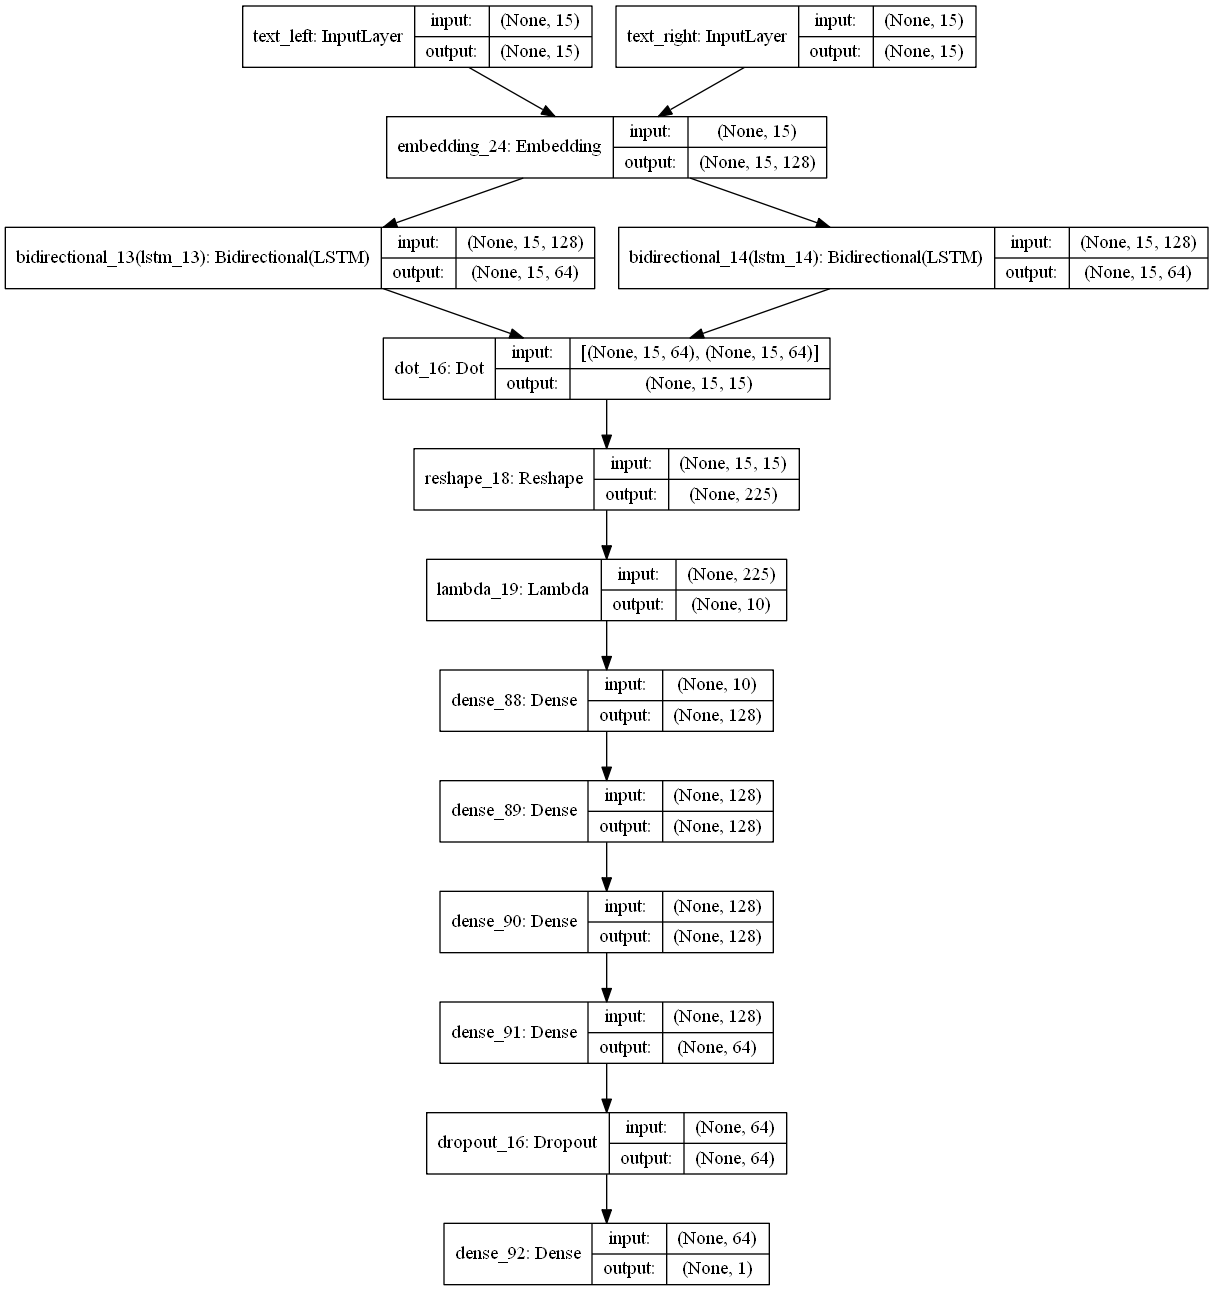

In [92]:
from keras.utils import plot_model
plot_model(model, './MVLSTM.png', show_shapes=True)

# ConvKNRM

In [96]:
query= Input(name='text_left', shape=(max_len,))
doc  = Input(name='text_right', shape=(max_len,))
embedding = Embedding(vocab_size, embedding_size)
# embed_query=embedding(query)
# embed_doc=embedding(doc)
q_embed = embedding(query)
d_embed = embedding(doc)
q_convs = []
d_convs = []
for i in range(3):
    c = keras.layers.Conv1D(
        128, i + 1,
        activation='tanh',
        padding='same'
    )
    q_convs.append(c(q_embed))
    d_convs.append(c(d_embed))

KM = []
for qi in range(3):
    for di in range(3):
        # do not match n-gram with different length if use crossmatch
        if not True and qi != di:
            continue
        q_ngram = q_convs[qi]
        d_ngram = d_convs[di]
        mm = keras.layers.Dot(axes=[2, 2],
                              normalize=True)([q_ngram, d_ngram])

        for i in range(11):
            mu = 1. / (11 - 1) + (2. * i) / (
                11 - 1) - 1.0
            sigma = 0.1
            if mu > 1.0:
                sigma = 0.001
                mu = 1.0
            mm_exp = _kernel_layer(mu, sigma)(mm)
            mm_doc_sum = keras.layers.Lambda(
                lambda x: tf.reduce_sum(x, 2))(
                mm_exp)
            mm_log = keras.layers.Activation(tf.math.log1p)(mm_doc_sum)
            mm_sum = keras.layers.Lambda(
                lambda x: tf.reduce_sum(x, 1))(mm_log)
            KM.append(mm_sum)

phi = keras.layers.Lambda(lambda x: tf.stack(x, 1))(KM)
x_out = Dense(1, activation='linear')(phi)
# self._backend = keras.Model(inputs=[query, doc], outputs=x_out)
model=Model(inputs=[query, doc],outputs=x_out)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_left (InputLayer)          (None, 15)           0                                            
__________________________________________________________________________________________________
text_right (InputLayer)         (None, 15)           0                                            
__________________________________________________________________________________________________
embedding_27 (Embedding)        (None, 15, 128)      1697664     text_left[0][0]                  
                                                                 text_right[0][0]                 
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 15, 128)      16512       embedding_27[0][0]         

In [97]:
epochs = 1

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(batch_gen_train, 
                    verbose=1, 
                    validation_data=batch_gen_val,
                    validation_steps=100,
                    steps_per_epoch=batch_count, 
                    epochs=epochs)

# 预测模型
score, acc = model.evaluate(batch_gen_test, steps=50, 
                                      max_queue_size=10, 
                                      use_multiprocessing=False)
print('score:', score, 'accuracy:', acc)

# 保存训练好的模型
# model.save("output/cnndssm_semantic_match.h5")
model.save_weights("output/ConvKNRM_weight.h5")

C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
50/50 [==============================] - 1s 24ms/step
score: 13.343083381652832 accuracy: 0.0
